[*********************100%***********************]  1 of 1 completed
<ipython-input-6-4f9e94a28fc6>:15: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date','Adj Close'],axis=1)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(1584, 1)
(680, 1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 358ms/step - loss: 0.1829
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 373ms/step - loss: 0.0165
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 359ms/step - loss: 0.0121
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 372ms/step - loss: 0.0126
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 362ms/step - loss: 0.0100
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 362ms/step - loss: 0.0104
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 361ms/step - loss: 0.0091
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 361ms/step - loss: 0.0091
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 377ms/step - loss: 0.0087
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 356ms/step - loss: 0.0075
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 358ms/step - loss: 0.0076
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 309ms/step - loss: 0.0086
Epoch 13/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - loss: 0.0087
Epoch 14/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 307ms/step - loss: 0.0086
Epoch 15/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 

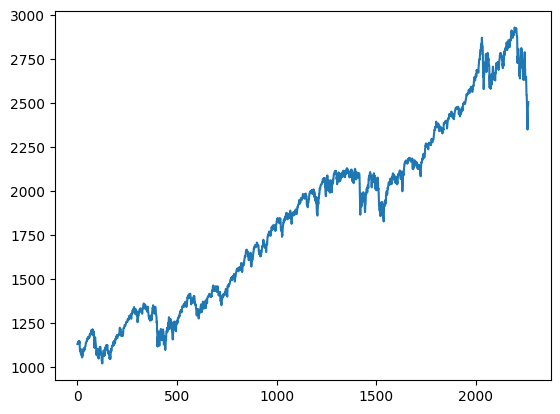

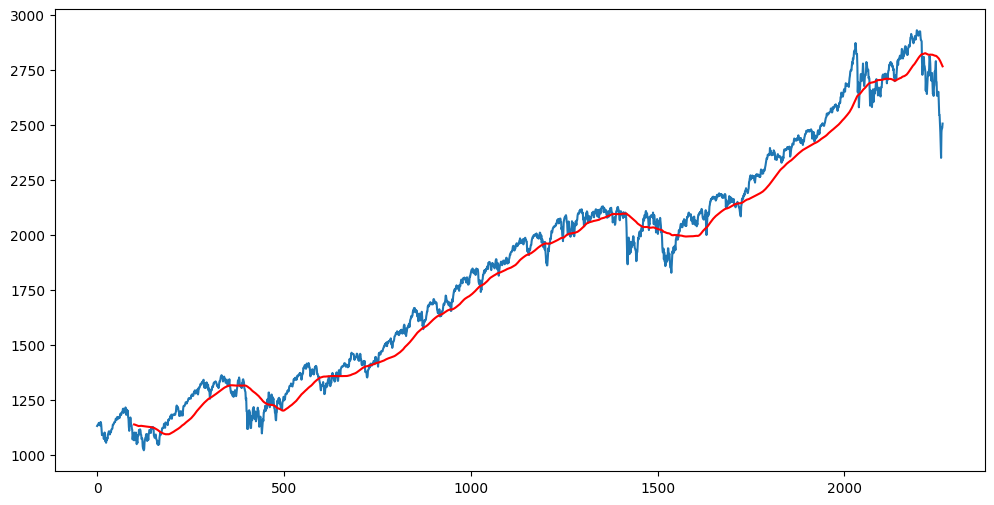

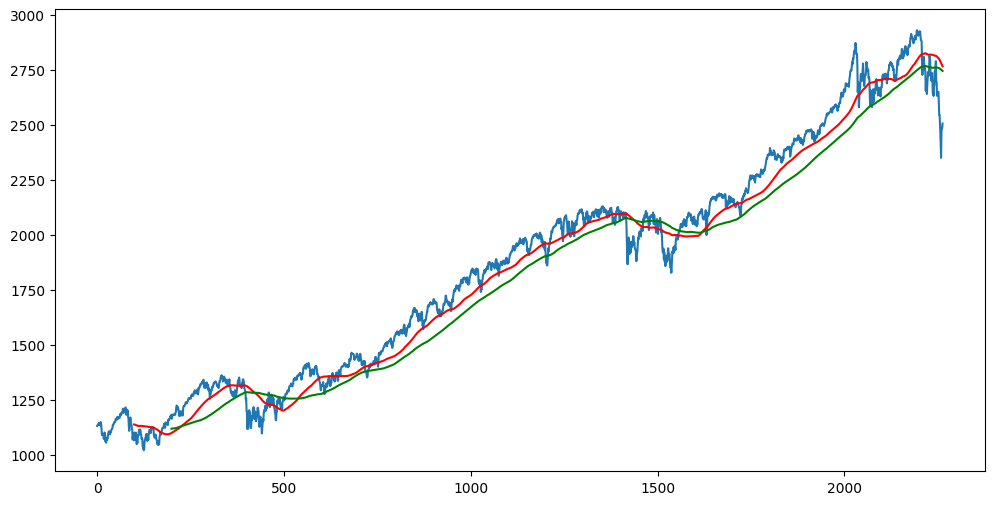

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt
import yfinance as yf
start = dt.datetime(2010,1,1)
end = dt.datetime(2019,1,1)

df = yf.download(tickers=['^GSPC'],start=start,end=end)
df.head()
df.tail()
df=df.reset_index()
df.head()
df=df.drop(['Date','Adj Close'],axis=1)
df.head()
plt.plot(df.Close)
df
ma100 = df.Close.rolling(100).mean()
ma100
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
ma200=df.Close.rolling(200).mean()
ma200
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
df.shape
# Splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)
data_training.head()
data_testing.head()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)
data_training_array
data_training_array.shape
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

In [7]:
model.save('keras_model.h5')

In [8]:
data_testing.head()

Ticker,^GSPC
1584,2102.399902
1585,2091.479980
1586,2091.580078
1587,2087.790039
1588,2091.699951


In [9]:
data_training.tail(100)

Ticker,^GSPC
1484,2089.139893
1485,2088.870117
1486,2090.110107
1487,2080.409912
1488,2102.629883
...,...
1579,2082.419922
1580,2082.780029
1581,2080.729980
1582,2094.340088


In [10]:
past_100_days=data_training.tail(100)

In [13]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [14]:
final_df.head()

Ticker,^GSPC
0,2089.139893
1,2088.870117
2,2090.110107
3,2080.409912
4,2102.629883


In [15]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.23605973],
       [0.23581485],
       [0.23694041],
       [0.22813542],
       [0.24830477],
       [0.22731857],
       [0.20018713],
       [0.23837445],
       [0.2251038 ],
       [0.21286785],
       [0.19837159],
       [0.20255613],
       [0.16637471],
       [0.17506148],
       [0.19455016],
       [0.22147295],
       [0.19317041],
       [0.16018416],
       [0.17434446],
       [0.19051985],
       [0.2135032 ],
       [0.21050771],
       [0.20643208],
       [0.22627478],
       [0.21265909],
       [0.19503116],
       [0.16663799],
       [0.17031416],
       [0.1463052 ],
       [0.10348835],
       [0.08437197],
       [0.08586063],
       [0.09948541],
       [0.05555209],
       [0.08419945],
       [0.04652028],
       [0.04742799],
       [0.02745831],
       [0.03622685],
       [0.07063827],
       [0.04357021],
       [0.06767003],
       [0.04889848],
       [0.05834781],
       [0.10090139],
       [0.10012077],
       [0.06712543],
       [0.075

In [16]:
input_data.shape

(780, 1)

In [17]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [18]:
x_test,y_test= np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [19]:
#making predictions
y_predicted=model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step


In [20]:
y_predicted.shape

(680, 1)

In [21]:
y_test

array([0.24809601, 0.23818386, 0.23827472, 0.23483445, 0.23838353,
       0.2415151 , 0.22396007, 0.21442   , 0.2290613 , 0.21266818,
       0.2015487 , 0.2011037 , 0.20701292, 0.20841992, 0.2317481 ,
       0.21365744, 0.21333988, 0.19745479, 0.21565437, 0.1979994 ,
       0.19838068, 0.19149117, 0.20263791, 0.19875287, 0.224187  ,
       0.23733066, 0.23693132, 0.24506439, 0.24314902, 0.24530949,
       0.25069217, 0.24512778, 0.25445909, 0.25692804, 0.26327317,
       0.25996897, 0.24235034, 0.22691014, 0.2235153 , 0.22004778,
       0.22593882, 0.21979359, 0.2307134 , 0.23584189, 0.23271033,
       0.25800839, 0.18910388, 0.15563651, 0.18790564, 0.21938516,
       0.2448829 , 0.2485953 , 0.23552432, 0.24567249, 0.24401131,
       0.27305812, 0.27964812, 0.29324564, 0.29350891, 0.30378428,
       0.30195977, 0.3066344 , 0.30381154, 0.3121988 , 0.30507316,
       0.31402331, 0.30807775, 0.3087131 , 0.30635318, 0.309512  ,
       0.31272534, 0.31022005, 0.29768448, 0.30382063, 0.30423

In [22]:
y_predicted

array([[0.24938497],
       [0.25160635],
       [0.25427455],
       [0.2572025 ],
       [0.2601579 ],
       [0.26293468],
       [0.26535875],
       [0.26726028],
       [0.26846677],
       [0.26893845],
       [0.26863596],
       [0.26750597],
       [0.265591  ],
       [0.26300064],
       [0.25997996],
       [0.25697613],
       [0.25432935],
       [0.25222397],
       [0.25060993],
       [0.2494703 ],
       [0.24869065],
       [0.24812602],
       [0.24760038],
       [0.24703678],
       [0.24639435],
       [0.24582562],
       [0.24559808],
       [0.2459359 ],
       [0.24700502],
       [0.24884292],
       [0.25134364],
       [0.25437492],
       [0.2577414 ],
       [0.26126364],
       [0.2647245 ],
       [0.2680517 ],
       [0.27114648],
       [0.27388194],
       [0.2760417 ],
       [0.27732876],
       [0.27753258],
       [0.27664518],
       [0.27481693],
       [0.27227688],
       [0.26938057],
       [0.26651338],
       [0.26420128],
       [0.262

In [23]:
scaler.scale_

array([0.00090771])

In [24]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

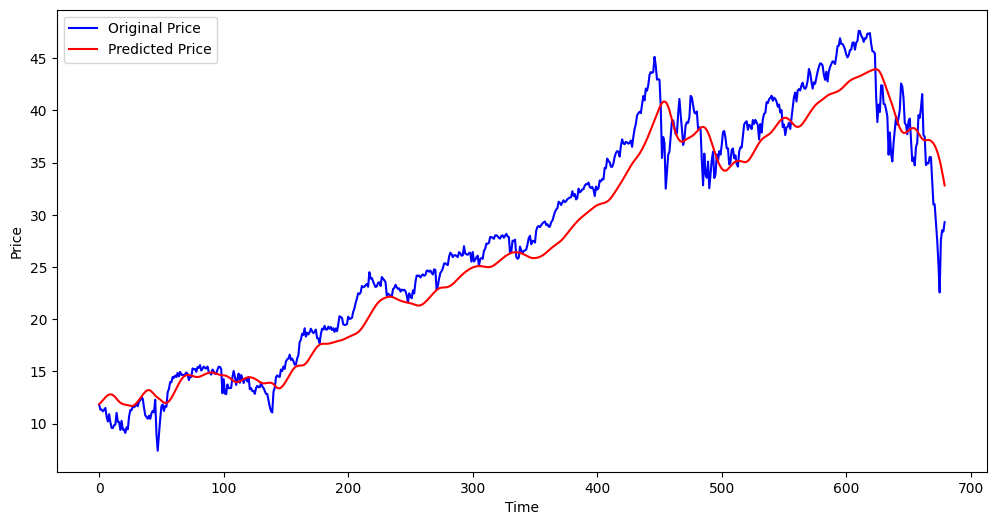

In [25]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()